In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline
df = pd.read_csv("car_evaluation.csv",header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
car.columns

NameError: name 'car' is not defined

In [5]:
car = pd.read_csv("car_evaluation.csv", names =['buying',  'maintainance',  'doors',  'persons',  'luggage_capacity', 'safety',  'class'],header =None )
car

,buying,maintainance,doors,persons,luggage_capacity,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
x = car.drop('class',axis=1)
y = car['class']

In [7]:
print("Frequency of each ordinal data in class\n",car['class'].value_counts())

Frequency of each ordinal data in class
 unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [8]:
print("Feature Vectors are\n",x.head())

Feature Vectors are
   buying maintainance doors persons luggage_capacity safety
0  vhigh        vhigh     2       2            small    low
1  vhigh        vhigh     2       2            small    med
2  vhigh        vhigh     2       2            small   high
3  vhigh        vhigh     2       2              med    low
4  vhigh        vhigh     2       2              med    med


In [9]:
print("target variable\n",y.head())

target variable
 0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object


In [10]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [11]:
!pip install category_encoders


In [12]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols =['buying','maintainance','doors','persons','luggage_capacity','safety'])
X_train  = encoder.fit_transform(X_train)
X_test =  encoder.transform(X_test)


In [13]:
X_train.head()

,buying,maintainance,doors,persons,luggage_capacity,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc

In [15]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8179


In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


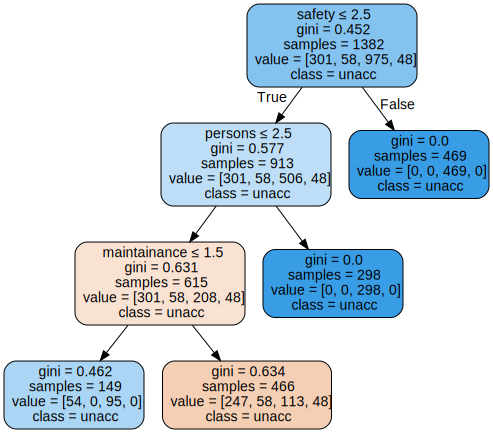

In [20]:
from sklearn.tree import export_graphviz
from sklearn import tree 
import graphviz
new_car = tree.export_graphviz(clf_gini,out_file=None,filled=True,special_characters=True,feature_names=list(X_train.columns),class_names=list(y_test),rounded=True)
graph = graphviz.Source(new_car)
graph

In [22]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(clf_gini.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

,Features,Importance
3,persons,0.534
5,safety,0.374
1,maintainance,0.091
0,buying,0.000
2,doors,0.000
4,luggage_capacity,0.000
